In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('scripts0120/mags3-1diff2_all2.txt', skiprows=1)
print df

        T400-T436  T400-T520  T400-T860  T400-G  T400-Gbp  T400-Grp  T400-u  \
0           0.957      2.105      3.324   2.883     2.296     3.277  -1.756   
1           0.955      2.044      3.321   2.878     2.288     3.274  -1.758   
2           0.952      1.963      3.311   2.865     2.272     3.262  -1.761   
3           0.943      1.863      3.282   2.831     2.236     3.231  -1.759   
4           0.916      1.731      3.207   2.748     2.153     3.148  -1.742   
5           0.861      1.561      3.062   2.595     2.008     2.994  -1.675   
6           0.783      1.383      2.876   2.407     1.834     2.801  -1.536   
7           0.706      1.227      2.697   2.230     1.673     2.618  -1.378   
8           0.642      1.097      2.548   2.085     1.542     2.467  -1.257   
9           0.951      2.110      3.329   2.888     2.301     3.282  -1.753   
10          0.950      2.050      3.327   2.884     2.294     3.280  -1.754   
11          0.946      1.969      3.317   2.871     

In [3]:
flagdf = pd.read_csv('scripts0120/mags3-1_labeled.txt')
print flagdf

        flag
0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
...      ...
205603     0
205604     0
205605     0
205606     0
205607     0
205608     0
205609     0
205610     0
205611     0
205612     0
205613     0
205614     0
205615     0
205616     0
205617     0
205618     0
205619     0
205620     0
205621     0
205622     0
205623     0
205624     0
205625     0
205626     0
205627     0
205628     0
205629     0
205630     0
205631     0
205632     0

[205633 rows x 1 columns]


In [14]:
df2 = df.iloc[:,:154]
print df2

        T400-T436  T400-T520  T400-T860  T400-G  T400-Gbp  T400-Grp  T400-u  \
0           0.957      2.105      3.324   2.883     2.296     3.277  -1.756   
1           0.955      2.044      3.321   2.878     2.288     3.274  -1.758   
2           0.952      1.963      3.311   2.865     2.272     3.262  -1.761   
3           0.943      1.863      3.282   2.831     2.236     3.231  -1.759   
4           0.916      1.731      3.207   2.748     2.153     3.148  -1.742   
5           0.861      1.561      3.062   2.595     2.008     2.994  -1.675   
6           0.783      1.383      2.876   2.407     1.834     2.801  -1.536   
7           0.706      1.227      2.697   2.230     1.673     2.618  -1.378   
8           0.642      1.097      2.548   2.085     1.542     2.467  -1.257   
9           0.951      2.110      3.329   2.888     2.301     3.282  -1.753   
10          0.950      2.050      3.327   2.884     2.294     3.280  -1.754   
11          0.946      1.969      3.317   2.871     

In [4]:
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
import matplotlib.pyplot as plt

/home/tomoesn/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df2, flagdf, test_size=0.2)

X_train2 = X_train.values
X_test2 = X_test.values
y_train2 = np.asarray(y_train).astype('float32')
y_test2 = np.asarray(y_test).astype('float32')

X_val = X_train2[:10000]
partial_X_train = X_train2[10000:]
y_val = y_train2[:10000]
partial_y_train = y_train2[10000:]

print type(X_val)
print type(partial_X_train)
print type(y_val)
print type(partial_y_train)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [16]:
print partial_X_train
print partial_X_train.shape

[[ 0.305  0.679  0.601 ... -0.063 -0.207 -0.144]
 [ 0.138 -0.17  -1.176 ... -0.42  -0.721 -0.301]
 [-0.005  0.093 -0.322 ... -0.203 -0.426 -0.223]
 ...
 [ 0.656  1.155  2.021 ...  0.182  0.167 -0.015]
 [ 0.777  2.117  3.495 ...  0.368  0.454  0.086]
 [ 0.305  0.657  0.985 ...  0.063 -0.005 -0.068]]
(154506, 154)


In [24]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(partial_X_train, partial_y_train, epochs=40, batch_size=512, validation_data=(X_val, y_val))

Train on 154506 samples, validate on 10000 samples
Epoch 1/40
154506/154506 [==============================] - 2s 11us/step - loss: 0.3907 - acc: 0.8010 - val_loss: 0.2661 - val_acc: 0.8810
Epoch 2/40
154506/154506 [==============================] - 1s 9us/step - loss: 0.2626 - acc: 0.8764 - val_loss: 0.2662 - val_acc: 0.8635
Epoch 3/40
154506/154506 [==============================] - 1s 9us/step - loss: 0.2221 - acc: 0.8990 - val_loss: 0.1625 - val_acc: 0.9368
Epoch 4/40
154506/154506 [==============================] - 1s 9us/step - loss: 0.1988 - acc: 0.9106 - val_loss: 0.2851 - val_acc: 0.8504
Epoch 5/40
154506/154506 [==============================] - 1s 9us/step - loss: 0.1832 - acc: 0.9191 - val_loss: 0.1674 - val_acc: 0.9296
Epoch 6/40
154506/154506 [==============================] - 1s 9us/step - loss: 0.1715 - acc: 0.9255 - val_loss: 0.1431 - val_acc: 0.9343
Epoch 7/40
154506/154506 [==============================] - 1s 9us/step - loss: 0.1605 - acc: 0.9302 - val_loss: 0.1213 

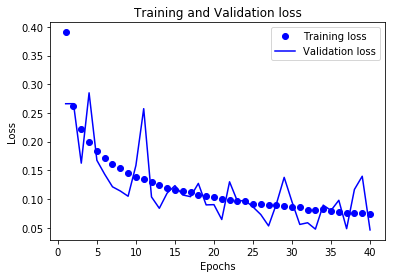

In [26]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
#accuracy = history_dict['acc']
epochs = range(1, len(loss_values) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
#plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

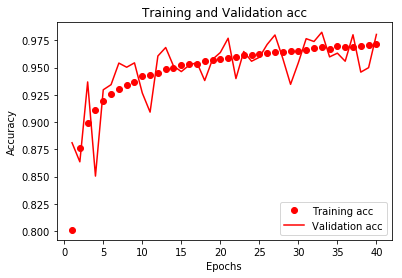

In [27]:
acc = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

plt.clf()
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
model.fit(X_train2, y_train2, epochs=31, batch_size=512)
results = model.evaluate(X_test2, y_test2)
print results

Epoch 1/31
164506/164506 [==============================] - 1s 8us/step - loss: 0.0734 - acc: 0.9716
Epoch 2/31
164506/164506 [==============================] - 1s 8us/step - loss: 0.0720 - acc: 0.9716
Epoch 3/31
164506/164506 [==============================] - 1s 9us/step - loss: 0.0705 - acc: 0.9718
Epoch 4/31
164506/164506 [==============================] - 1s 9us/step - loss: 0.0701 - acc: 0.9734
Epoch 5/31
164506/164506 [==============================] - 1s 9us/step - loss: 0.0693 - acc: 0.9734
Epoch 6/31
164506/164506 [==============================] - 1s 8us/step - loss: 0.0688 - acc: 0.9731
Epoch 7/31
164506/164506 [==============================] - 1s 9us/step - loss: 0.0681 - acc: 0.9740
Epoch 8/31
164506/164506 [==============================] - 1s 8us/step - loss: 0.0676 - acc: 0.9743
Epoch 9/31
164506/164506 [==============================] - 1s 8us/step - loss: 0.0681 - acc: 0.9745
Epoch 10/31
164506/164506 [==============================] - 1s 8us/step - loss: 0.0661 - a

In [29]:
NB400_df = pd.read_csv('/home/iwasaki/Desktop/konan/EMPstar/catalog/EMPStars.N400mag', delimiter=' ', header=None)
print NB400_df

     0         1         2           3          4          5       6      7   \
0    91  772.3188  623.8643  261.495401  -2.743587  12.144320  0.0089  1.953   
1    87  769.7310  575.9352  205.009315  -0.038939  11.364605  0.0030  1.837   
2    13  654.3881  730.4556  203.666069 -16.323094  10.439814  0.0038  3.092   
3    23  666.3901  698.9172  198.480576 -12.194908  12.800848  0.0275  2.255   
4    13  657.6500  624.9166  278.829767  28.697677  11.825121  0.0906  1.066   
5    79  758.6936  524.1969  162.865823  20.275097   8.348403  0.0002  2.645   
6    24  694.4124  546.1976  205.861153  15.575261   9.163782  0.0007  3.429   
7    91  764.1949  615.6635  146.408344  -4.675675  11.059838  0.0026  2.097   
8   114  776.5984  610.6636  250.808204  -1.925769  12.540919  0.0075  1.866   
9    77  686.3518  675.9690  148.161176  57.916255  10.432349  0.0012  2.081   
10    7  812.1197  776.6849  210.625062  -5.653091  11.481319  0.0185  2.412   
11  101  123.9174  571.1514  222.259824 

In [37]:
NB400_df2 = pd.read_csv('/home/iwasaki/Desktop/konan/EMPstar/catalog/otherStars.allother', delimiter=' ')
print NB400_df2

           RA400       RA520     Dec400     Dec520      dist      NB400  \
0     123.872844  123.872845  68.683475  68.683455  0.069123  13.340788   
1     124.207691  124.207823  68.680683  68.680647  0.214902  15.637588   
2     123.168458  123.168482  68.361272  68.361161  0.399770  15.873488   
3     123.638650  123.638416  68.377007  68.376947  0.378190  15.133988   
4     124.098064  124.097984  68.384933  68.384861  0.279889  12.119088   
5     123.377490  123.377336  68.381196  68.381183  0.209156  11.909688   
6     123.289024  123.288974  68.396495  68.396473  0.103270  11.767688   
7     123.194655  123.194566  68.412188  68.412148  0.184592  14.233688   
8     124.164240  124.164152  68.440358  68.440265  0.354672  12.964788   
9     124.089638  124.089502  68.445694  68.445734  0.231397  15.772688   
10    123.203603  123.203847  68.474254  68.474233  0.330934   6.306188   
11    123.788755  123.788578  68.491759  68.491716  0.280851  15.264388   
12    123.395227  123.395

In [38]:
NB400_df3 = NB400_df2.sort_values('RA400')
print NB400_df3

          RA400       RA520     Dec400     Dec520      dist      NB400  \
532   46.849722   46.849690  26.341348  26.340983  1.318617  14.281539   
524   46.861742   46.861669  26.248048  26.248058  0.237963  12.591139   
522   46.901280   46.901566  26.503952  26.503869  0.969329  13.611139   
531   46.944870   46.944901  26.341012  26.340947  0.252727  12.426539   
530   46.960825   46.960831  26.335925  26.335852  0.267126  12.602439   
526   47.005446   47.005397  26.290289  26.290206  0.337491  12.383739   
528   47.047832   47.047806  26.295803  26.295769  0.150024  10.933239   
535   47.047833   47.047969  26.416959  26.416801  0.718848  14.012739   
529   47.105352   47.105365  26.326572  26.326525  0.173442   8.248239   
534   47.180099   47.180084  26.386481  26.386339  0.513364  12.668439   
537   47.188275   47.188288  26.464147  26.463716  1.553631  14.547839   
525   47.234723   47.234741  26.276305  26.276288  0.084542  11.902939   
533   47.244724   47.244614  26.362294

In [39]:
NB400_df4 = NB400_df3.reset_index(drop=True)
print NB400_df4

           RA400       RA520     Dec400     Dec520      dist      NB400  \
0      46.849722   46.849690  26.341348  26.340983  1.318617  14.281539   
1      46.861742   46.861669  26.248048  26.248058  0.237963  12.591139   
2      46.901280   46.901566  26.503952  26.503869  0.969329  13.611139   
3      46.944870   46.944901  26.341012  26.340947  0.252727  12.426539   
4      46.960825   46.960831  26.335925  26.335852  0.267126  12.602439   
5      47.005446   47.005397  26.290289  26.290206  0.337491  12.383739   
6      47.047832   47.047806  26.295803  26.295769  0.150024  10.933239   
7      47.047833   47.047969  26.416959  26.416801  0.718848  14.012739   
8      47.105352   47.105365  26.326572  26.326525  0.173442   8.248239   
9      47.180099   47.180084  26.386481  26.386339  0.513364  12.668439   
10     47.188275   47.188288  26.464147  26.463716  1.553631  14.547839   
11     47.234723   47.234741  26.276305  26.276288  0.084542  11.902939   
12     47.244724   47.244

In [40]:
NB400_df5 = NB400_df4.iloc[:, 5:]
print NB400_df5

          NB400      NB860      NB436      NB520
0     14.281539  11.829985  13.663976  13.375355
1     12.591139  11.106485  12.306476  12.430555
2     13.611139  11.694785  13.372576  12.958255
3     12.426539  10.815185  12.253776  12.259055
4     12.602439  10.614485  12.401376  12.366455
5     12.383739   8.636185  11.770976  11.300755
6     10.933239   9.179485  10.793376  10.883955
7     14.012739  12.482885  13.912176  13.678655
8      8.248239   6.311485   8.186576   8.194455
9     12.668439  10.065485  12.403476  12.078355
10    14.547839  11.566885  14.067076  13.389855
11    11.902939   7.363385  11.120776  10.368355
12    10.513139   7.926285  10.306776   9.927055
13    11.305139   9.615385  11.316576  11.033355
14    11.744339   9.080785  11.550376  11.032055
15    11.529239   4.828085  10.202876   8.788855
16    12.767339   9.597085  12.498476  11.908055
17    12.352176  10.069544  12.047589  11.683123
18    11.945476  10.471544  11.777689  11.656823
19    10.427976   8.

In [42]:
NB400_df4.to_csv('/home/iwasaki/Desktop/konan/EMPstar/catalog/otherStars3.allother', index=False)

In [43]:
NB400_df6 = pd.read_csv('/home/iwasaki/Desktop/konan/EMPstar/catalog/otherStars2.allother', delimiter=' ')
print NB400_df6

              RA        Dec  N400-N436  N400-N520  N400-N860  N436-N520  \
0      46.849722  26.341348   0.617563   0.906184   2.451554   0.288621   
1      46.861742  26.248048   0.284663   0.160584   1.484654  -0.124079   
2      46.901280  26.503952   0.238563   0.652884   1.916354   0.414321   
3      46.944870  26.341012   0.172763   0.167484   1.611354  -0.005279   
4      46.960825  26.335925   0.201063   0.235984   1.987954   0.034921   
5      47.005446  26.290289   0.612763   1.082984   3.747554   0.470221   
6      47.047832  26.295803   0.139863   0.049284   1.753754  -0.090579   
7      47.047833  26.416959   0.100563   0.334084   1.529854   0.233521   
8      47.105352  26.326572   0.061663   0.053784   1.936754  -0.007879   
9      47.180099  26.386481   0.264963   0.590084   2.602954   0.325121   
10     47.188275  26.464147   0.480763   1.157984   2.980954   0.677221   
11     47.234723  26.276305   0.782163   1.534584   4.539554   0.752421   
12     47.244724  26.3622

In [45]:
df3 = df.loc[:, ['T400-T436','T400-T520','T400-T860','T436-T520','T436-T860','T520-T860']]
print df3

        T400-T436  T400-T520  T400-T860  T436-T520  T436-T860  T520-T860
0           0.957      2.105      3.324      1.148      2.367      1.219
1           0.955      2.044      3.321      1.089      2.366      1.277
2           0.952      1.963      3.311      1.011      2.359      1.348
3           0.943      1.863      3.282      0.920      2.339      1.419
4           0.916      1.731      3.207      0.815      2.291      1.476
5           0.861      1.561      3.062      0.700      2.201      1.501
6           0.783      1.383      2.876      0.600      2.093      1.493
7           0.706      1.227      2.697      0.521      1.991      1.470
8           0.642      1.097      2.548      0.455      1.906      1.451
9           0.951      2.110      3.329      1.159      2.378      1.219
10          0.950      2.050      3.327      1.100      2.377      1.277
11          0.946      1.969      3.317      1.023      2.371      1.348
12          0.937      1.869      3.288      0.932 

In [46]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3, flagdf, test_size=0.2)

X_train4 = X_train3.values
X_test4 = X_test3.values
y_train4 = np.asarray(y_train3).astype('float32')
y_test4 = np.asarray(y_test3).astype('float32')

X_val2 = X_train4[:10000]
partial_X_train2 = X_train4[10000:]
y_val2 = y_train4[:10000]
partial_y_train2 = y_train4[10000:]

print type(X_val2)
print type(partial_X_train2)
print type(y_val2)
print type(partial_y_train2)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [47]:
model2 = models.Sequential()
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history2 = model2.fit(partial_X_train2, partial_y_train2, epochs=40, batch_size=512, validation_data=(X_val2, y_val2))

Train on 154506 samples, validate on 10000 samples
Epoch 1/40
154506/154506 [==============================] - 1s 8us/step - loss: 0.5489 - acc: 0.6850 - val_loss: 0.5033 - val_acc: 0.7117
Epoch 2/40
154506/154506 [==============================] - 1s 7us/step - loss: 0.4906 - acc: 0.7457 - val_loss: 0.4889 - val_acc: 0.7607
Epoch 3/40
154506/154506 [==============================] - 1s 6us/step - loss: 0.4643 - acc: 0.7615 - val_loss: 0.4510 - val_acc: 0.7723
Epoch 4/40
154506/154506 [==============================] - 1s 6us/step - loss: 0.4487 - acc: 0.7683 - val_loss: 0.4507 - val_acc: 0.7587
Epoch 5/40
154506/154506 [==============================] - 1s 6us/step - loss: 0.4384 - acc: 0.7754 - val_loss: 0.4274 - val_acc: 0.7840
Epoch 6/40
154506/154506 [==============================] - 1s 6us/step - loss: 0.4303 - acc: 0.7796 - val_loss: 0.4359 - val_acc: 0.7747
Epoch 7/40
154506/154506 [==============================] - 1s 6us/step - loss: 0.4240 - acc: 0.7828 - val_loss: 0.4180 -

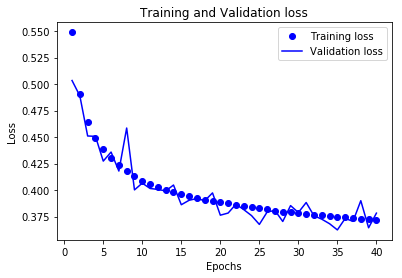

In [49]:
history2_dict = history2.history
loss_values2 = history2_dict['loss']
val_loss_values2 = history2_dict['val_loss']
#accuracy = history_dict['acc']
epochs2 = range(1, len(loss_values2) + 1)

plt.clf()
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
#plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

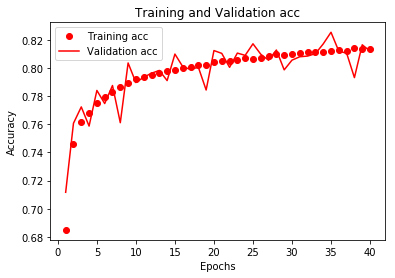

In [50]:
acc2 = history2_dict['acc']
val_acc_values2 = history2_dict['val_acc']
epochs2 = range(1, len(loss_values2) + 1)

plt.clf()
plt.plot(epochs2, acc2, 'ro', label='Training acc')
plt.plot(epochs2, val_acc_values2, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
model2.fit(X_train4, y_train4, epochs=31, batch_size=512)
results2 = model2.evaluate(X_test4, y_test4)
print results2

Epoch 1/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3713 - acc: 0.8145
Epoch 2/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3705 - acc: 0.8151
Epoch 3/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3697 - acc: 0.8156
Epoch 4/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3701 - acc: 0.8161
Epoch 5/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3685 - acc: 0.8158
Epoch 6/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3691 - acc: 0.8162
Epoch 7/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3682 - acc: 0.8165
Epoch 8/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3675 - acc: 0.8168
Epoch 9/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3667 - acc: 0.8179
Epoch 10/31
164506/164506 [==============================] - 1s 6us/step - loss: 0.3664 - a

In [54]:
print y_test4

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [52]:
NB400_df7 = NB400_df6.iloc[:, 2:]
print NB400_df7

      N400-N436  N400-N520  N400-N860  N436-N520  N436-N860  N520-N860
0      0.617563   0.906184   2.451554   0.288621   1.833991   1.545370
1      0.284663   0.160584   1.484654  -0.124079   1.199991   1.324070
2      0.238563   0.652884   1.916354   0.414321   1.677791   1.263470
3      0.172763   0.167484   1.611354  -0.005279   1.438591   1.443870
4      0.201063   0.235984   1.987954   0.034921   1.786891   1.751970
5      0.612763   1.082984   3.747554   0.470221   3.134791   2.664570
6      0.139863   0.049284   1.753754  -0.090579   1.613891   1.704470
7      0.100563   0.334084   1.529854   0.233521   1.429291   1.195770
8      0.061663   0.053784   1.936754  -0.007879   1.875091   1.882970
9      0.264963   0.590084   2.602954   0.325121   2.337991   2.012870
10     0.480763   1.157984   2.980954   0.677221   2.500191   1.822970
11     0.782163   1.534584   4.539554   0.752421   3.757391   3.004970
12     0.206363   0.586084   2.586854   0.379721   2.380491   2.000770
13    

In [58]:
NB400_df8 = NB400_df7.values
predict = model2.predict(NB400_df8)
print predict

[[4.0315545e-01]
 [1.1001641e-22]
 [7.0942283e-02]
 ...
 [9.0752377e-07]
 [7.4966641e-22]
 [8.6458817e-02]]


In [61]:
print np.min(predict)
print np.max(predict)
print type(predict)

0.0
0.9725054
<type 'numpy.ndarray'>


(array([942.,  22.,  14.,   9.,   8.,  10.,  10.,   7.,   6.,   5.]),
 array([0.        , 0.09725054, 0.19450107, 0.29175162, 0.38900214,
        0.4862527 , 0.58350325, 0.68075377, 0.7780043 , 0.87525487,
        0.9725054 ], dtype=float32),
 <a list of 10 Patch objects>)

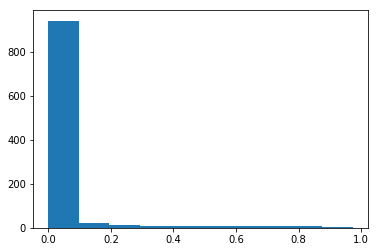

In [60]:
plt.hist(predict)

In [65]:
np.set_printoptions(suppress=True)
predictres = np.concatenate([NB400_df6.values, predict], 1)
print predictres

[[ 46.849722    26.341348     0.617563   ...   1.833991     1.54537
    0.40315545]
 [ 46.861742    26.248048     0.284663   ...   1.199991     1.32407
    0.        ]
 [ 46.90128     26.503952     0.238563   ...   1.677791     1.26347
    0.07094228]
 ...
 [291.334497    40.853572     0.985094   ...   5.93818      4.710258
    0.00000091]
 [291.352296    40.613437     0.158594   ...   3.76468      3.185358
    0.        ]
 [296.939986    40.91883      1.236753   ...   3.821001     2.923287
    0.08645882]]


In [66]:
candidates = predictres[predictres[:, 8] > 0.8]
print candidates

[[112.196213    32.740463     0.281761     1.565169     2.99042
    1.283408     2.708659     1.425251     0.95970863]
 [112.442289    23.972652     0.270072     1.383575     2.586985
    1.113503     2.316913     1.20341      0.97250539]
 [141.747478    -5.870667     0.405371     1.315361     2.831103
    0.90999      2.425732     1.515742     0.841461  ]
 [146.190365    -4.784079     0.317096     1.076028     2.274641
    0.758932     1.957545     1.198613     0.92781538]
 [146.193549    -4.64887      0.348896     1.073728     2.243541
    0.724832     1.894645     1.169813     0.87527889]
 [153.23882     53.484151     0.390671     1.209702     2.45866
    0.819031     2.067989     1.248958     0.8661111 ]
 [153.262284    53.596926     0.111971     0.593102     1.13286
    0.481131     1.020889     0.539758     0.847067  ]
 [178.205006    37.912659     0.37067      1.111307     2.449252
    0.740637     2.078582     1.337945     0.84638858]
 [211.138615   -14.908028     0.337537     